In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
hmap = pd.read_csv('../data/highway_map.csv', names=['x', 'y', 's', 'dx', 'dy'], sep=' ')
hmap.head()

,x,y,s,dx,dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992


In [3]:
idx = np.arange(len(hmap))

s = 0  # smoothing factor; s=0 hits all knots exactly
k = 3  # order of spline; should probably be odd

spline_x = interpolate.UnivariateSpline(idx, hmap['x'], k=k, s=s)
spline_y = interpolate.UnivariateSpline(idx, hmap['y'], k=k, s=s)
spline_s = interpolate.UnivariateSpline(idx, hmap['s'], k=k, s=s)

spline_dx = spline_x.derivative(1)
spline_dy = spline_y.derivative(1)

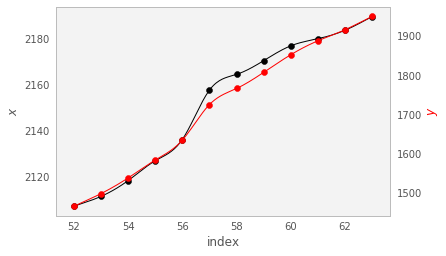

In [4]:

fig, ax = plt.subplots()
bx = ax.twinx()

idx_plot = np.arange(52, 64)
ax.scatter(idx_plot, hmap['x'][idx_plot], color='black')
bx.scatter(idx_plot, hmap['y'][idx_plot], color='red')

idx_plot_fine = np.linspace(idx_plot[0], idx_plot[-1], 200)
ax.plot(idx_plot_fine, spline_x(idx_plot_fine), color='black')
bx.plot(idx_plot_fine, spline_y(idx_plot_fine), color='red')

ax.set_xlabel('index')
ax.set_ylabel('$x$')
bx.set_ylabel('$y$', color='red')

for a in ax, bx:
    a.grid(False)

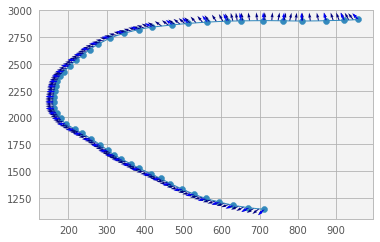

In [5]:
fig, ax = plt.subplots()

imin = 130
d = 50
idx_plot = np.arange(imin, imin + d)
ax.scatter(hmap['x'][idx_plot], hmap['y'][idx_plot])

idx_plot_fine = np.linspace(idx_plot[0], idx_plot[-1], 200)
ax.plot(spline_x(idx_plot_fine), spline_y(idx_plot_fine))

idx_plot_shift = np.linspace(float(idx_plot[0]), idx_plot[-1], len(idx_plot) * 3)

dx = spline_dx(idx_plot_shift)
dy = spline_dy(idx_plot_shift)

theta = np.arctan2(dy, dx)
theta_antinormal = theta - np.pi / 2

dx_antinormal = np.cos(theta_antinormal)
dy_antinormal = np.sin(theta_antinormal)

ax.quiver(
    spline_x(idx_plot_shift), spline_y(idx_plot_shift),
    dx_antinormal, dy_antinormal,
    angles='xy', color='navy', width=.003, scale=40
)

ax.quiver(
    hmap['x'][idx_plot], hmap['y'][idx_plot],
    hmap['dx'][idx_plot], hmap['dy'][idx_plot],
    angles='xy', color='blue', width=.003, scale=40
)

# xl = ax.get_xlim()
# yl = ax.get_ylim()
# dx = xl[1] - xl[0]
# dy = yl[1] - yl[0]
# d = max(dx, dy)
# ax.set_xlim(xl[0], xl[0] + d)
# ax.set_ylim(yl[0], yl[0] + d)


In [6]:
hmap.head()

,x,y,s,dx,dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992


In [7]:
df = pd.DataFrame()
ndata = len(hmap)
idx_fine = np.linspace(0.0, ndata - 1, ndata * 30)
df['x'] = spline_x(idx_fine)
df['y'] = spline_y(idx_fine)
df['s'] = spline_s(idx_fine)

dx = spline_dx(idx_fine)
dy = spline_dy(idx_fine)

theta = np.arctan2(dy, dx)
theta_antinormal = theta - np.pi / 2

dx_antinormal = np.cos(theta_antinormal)
dy_antinormal = np.sin(theta_antinormal)

df['dx'] = dx_antinormal
df['dy'] = dy_antinormal

df.head(60)

,x,y,s,dx,dy
0,784.600100,1135.571000,-2.754124e-16,-0.039697,-0.999212
1,785.672484,1135.529186,1.072764e+00,-0.038229,-0.999269
2,786.739923,1135.489126,2.140570e+00,-0.036777,-0.999324
3,787.802536,1135.450785,3.203538e+00,-0.035342,-0.999375
4,788.860446,1135.414126,4.261790e+00,-0.033924,-0.999424
5,789.913771,1135.379111,5.315446e+00,-0.032525,-0.999471
6,790.962635,1135.345705,6.364628e+00,-0.031145,-0.999515
7,792.007156,1135.313870,7.409456e+00,-0.029785,-0.999556
8,793.047455,1135.283570,8.450052e+00,-0.028446,-0.999595
9,794.083655,1135.254768,9.486536e+00,-0.027128,-0.999632


In [8]:
df.to_csv('../data/highway_map_fine.csv', index=False, header=False, sep=' ')
!head ../data/highway_map_fine.csv
!echo
!head ../data/highway_map.csv

784.6001000000002 1135.5710000000004 -2.754124363884191e-16 -0.03969733001523204 -0.9992117503260567
785.6724842769787 1135.5291855765424 1.0727638909384372 -0.03822896060000404 -0.9992690061096878
786.739922812582 1135.4891262501317 2.140569530044522 -0.03677680010692271 -0.9993235046639779
787.8025363564702 1135.4507852817824 3.2035378439663798 -0.03534158955523613 -0.9993752908931205
788.8604456583043 1135.414125932511 4.261789759352137 -0.033924071134007645 -0.9994244130486781
789.913771467744 1135.379111463333 5.315446202849916 -0.032524987362772914 -0.9994709226370978
790.9626345344502 1135.3457051352639 6.364628101107843 -0.03114508023122345 -0.9995148743152303
792.0071556080827 1135.313870209318 7.409456380774043 -0.029785090319412115 -0.9995563257739228
793.0474554383024 1135.2835699465127 8.450051968496647 -0.028445755900085256 -0.9995953376098113
794.0836547747692 1135.2547676078618 9.486535790923767 -0.0271278120248423 -0.9996319731855043

784.6001 1135.571 0 -0.02359831 -0